In [1]:
%cd ../

/mnt/data/zhangtianning/projects/PromptNougat


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from PIL import Image, ImageDraw

In [3]:
image = data['image']
bboxes= data['bboxes']
image = Image.fromarray(image)
draw = ImageDraw.Draw(image)

height,width = image.width, image.height
for box in bboxes.reshape(-1,4):
    # Unpack the bounding box
    x_min, y_min, x_max, y_max = box
    # Draw the rectangle
    draw.rectangle([x_min*width, y_min*height, x_max*width, y_max*height], outline='red', width=2)

NameError: name 'data' is not defined

In [ ]:
data['image'].shape

In [ ]:
width, height, _ = img.shape

In [ ]:
image

# DeBug

#### debug dataset

In [1]:
%cd ..

/mnt/data/zhangtianning/projects/PromptNougat


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
from dataset.dataset_arguements import UparxiveDatasetConfig
from model.processor_arguements import UparxiveBetaProcessorConfig
processor_config = UparxiveBetaProcessorConfig()

In [7]:
dataset_config = UparxiveDatasetConfig(root_name='data')
dataset_config._processor = processor_config
dataset_config._max_length = 4096
dataset_config._decoder_start_token_id  = 0

In [18]:
from dataset.loader import load_data
datasets = load_data(dataset_config)
dataset = datasets['train']


In [25]:
dataset.eval()
dataset.force_use_augmentation = True

In [11]:
from PIL import Image, ImageDraw
import numpy as np

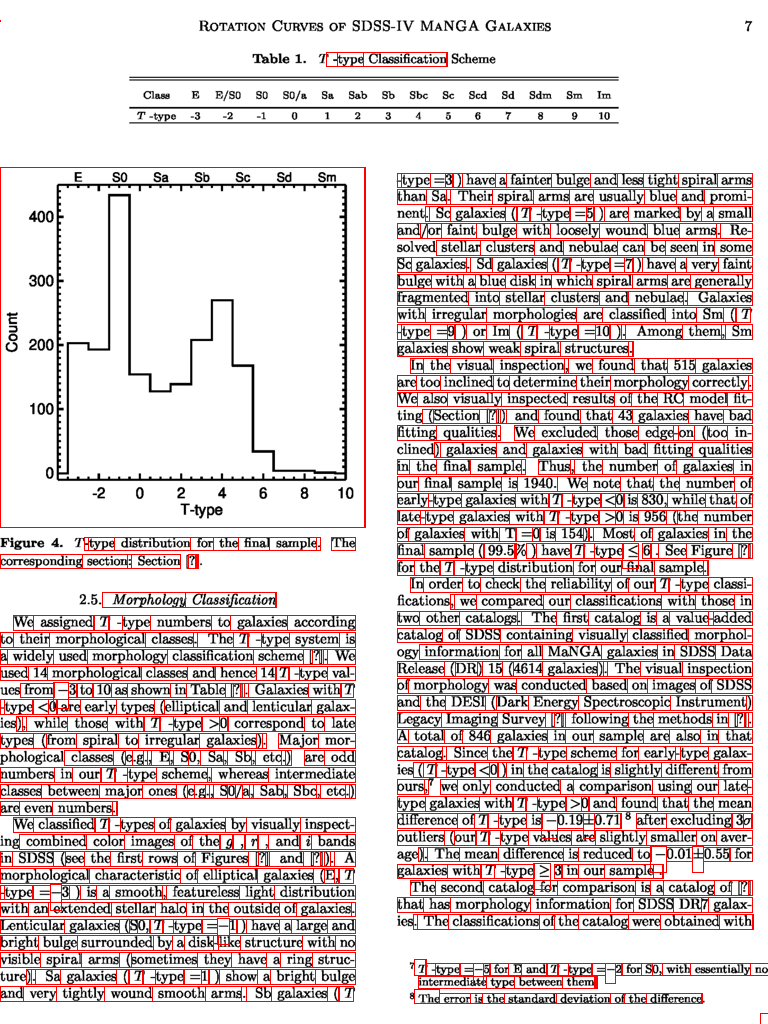

In [43]:
input_tensor, token_ids, token_types, prompts, attention_mask = dataset[59]
image_data = input_tensor.permute(1,2,0).numpy()
image_data = image_data*np.array([[datasets['train'].processor.image_processor.image_std]])
image_data = image_data+np.array([[datasets['train'].processor.image_processor.image_mean]])
image_data = np.round(image_data*255).astype('uint8')

image = Image.fromarray(image_data)

bboxes = prompts[attention_mask].view(-1,4)[1:]
width, height= image.size
bboxes[:,[0,2]]*=width
bboxes[:,[1,3]]*=height


draw = ImageDraw.Draw(image)

# Draw bounding boxes
for box in bboxes:
    # Unpack the bounding box
    x_min, y_min, x_max, y_max = box
    # Draw the rectangle
    draw.rectangle([x_min, y_min, x_max, y_max], outline='red')
image

#### debug processror

In [ ]:
%cd ..

In [4]:
from transformers import AutoProcessor,VisionEncoderDecoderConfig,PretrainedConfig

In [ ]:
from model.processing_uparxive import *
from model.image_processing_uparxive import *
processer = AutoProcessor.from_pretrained("config/processor/uparxive_beta",trust_remote_code=True)

In [ ]:
from transformers import SamImageProcessor

In [ ]:
import fitz,io
from PIL import Image, ImageOps

In [ ]:
pdf_path = "/mnt/data/zhangtianning/datasets/ai4science_nougat/archive_tex.colorful.addbbl.partial_successed/1003/1003.5792/boxed_pdf_image/etaGmixingSK.colorful.pdf"

In [ ]:
import os
ROOT ="/mnt/data/zhangtianning/datasets/ai4science_nougat/archive_tex.colorful.addbbl.partial_successed/1003/1003.5792"
page_name_list = os.listdir(os.path.join(ROOT,"boxed_pdf_image","text_bbox"))
pdf_path =  os.path.join(ROOT,"boxed_pdf_image","etaGmixingSK.colorful.text_only.pdf")

In [ ]:
from dataset.resource_utils import *

In [ ]:
dpi= 200
image_list1 = []
image_list2 = []
bboxes_list = []
with fitz.open(pdf_path) as pdf:
    for page_idx in range(len(pdf)):
        page_name = f"page_{page_idx}.csv"
        boxed_information_path =os.path.join(ROOT,"boxed_pdf_image","text_bbox",page_name)
        if not os.path.exists(boxed_information_path):
            print(f"no bbox here at {page_name}")
            continue
        page = pdf[page_idx]
        image = Image.open(io.BytesIO(page.get_pixmap(colorspace=fitz.csGRAY,dpi=dpi).pil_tobytes(format="PNG")))
        gray_image = ImageOps.grayscale(image).convert('RGB')
        image_list1.append(gray_image)
        
        df         = robust_csv_reader(boxed_information_path)
        status, df = filter_df(df)
        formated_token_bbox_pair = obtain_cleaned_token_type_bbox_pair(df)
        pretext, token_ids, bboxes, text_type = obtain_clean_tokenid_bbox_pair(formated_token_bbox_pair,None)
        bboxes = fill_empty_bbox_follow_last(bboxes)
        bboxes_list.append(bboxes)

In [ ]:
from transformers import AutoProcessor

In [ ]:
width, height= image_list1[0].size

In [ ]:
bboxes_batch = []
for bboxes in bboxes_list:
    bboxes = np.array(bboxes).reshape(-1,4)
    bboxes[:,[0,2]]*=width
    bboxes[:,[1,3]]*=height
    bboxes_batch.append(bboxes)

In [ ]:
from PIL import ImageDraw

In [ ]:
# idx = 1
# image = image_list1[idx].copy()
# draw  = ImageDraw.Draw(image)
# for box in bboxes_batch[idx]:
#     x_min, y_min, x_max, y_max = box
#     draw.rectangle([x_min, y_min, x_max, y_max], outline='red', width=2)
# image

In [ ]:
UparxiveAdvanceProcessor

In [ ]:
processer

In [ ]:
processer = UparxiveImageProcessor(do_crop_margin=False, do_align_long_axis=True,do_pad=True, do_resize=False, do_thumbnail=True,do_rescale=False, do_normalize=False, return_tensors='npy')
output = processer.augmentation_image_processing(image_list1[1:2], bboxes_batch[1:2],random_resize_std=0.2,random_pad_pixels=500)

In [ ]:
from PIL import ImageDraw

In [ ]:
image = Image.fromarray(np.transpose(output['pixel_values'][0],(1,2,0)))
draw = ImageDraw.Draw(image)
# Draw bounding boxes
for box in output['bboxes'][0]:
    # Unpack the bounding box
    x_min, y_min, x_max, y_max = box
    # Draw the rectangle
    draw.rectangle([x_min, y_min, x_max, y_max], outline='red', width=2)
image

In [ ]:
self = processer

In [ ]:
images = image_list1[1:2]
bboxes_batch=bboxes_batch[1:2]

In [ ]:
bboxes_batch

In [ ]:
do_crop_margin = False
do_resize = True
size = {
    "height": 896,
    "width": 672
  }
resample = 2
do_thumbnail = None
do_align_long_axis = None
do_pad = None
do_rescale = None
rescale_factor = None
do_normalize = None
image_mean = None
image_std = None
return_tensors = None
data_format = None
input_data_format = None

In [ ]:
images = make_list_of_images(images)

if not valid_images(images):
    raise ValueError(
        "Invalid image type. Must be of type PIL.Image.Image, numpy.ndarray, "
        "torch.Tensor, tf.Tensor or jax.ndarray."
    )
validate_preprocess_arguments(
    do_rescale=do_rescale,
    rescale_factor=rescale_factor,
    do_normalize=do_normalize,
    image_mean=image_mean,
    image_std=image_std,
    do_pad=do_pad,
    size_divisibility=size,  # There is no pad divisibility in this processor, but pad requires the size arg.
    do_resize=do_resize,
    size=size,
    resample=resample,
)

# All transformations expect numpy arrays.
images = [to_numpy_array(image) for image in images]

if is_scaled_image(images[0]) and do_rescale:
    logger.warning_once(
        "It looks like you are trying to rescale already rescaled images. If the input"
        " images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again."
    )

if input_data_format is None:
    # We assume that all images have the same channel dimension format.
    input_data_format = infer_channel_dimension_format(images[0])

images_and_bboxes = list(zip(images,bboxes_batch))
if do_crop_margin:
    images_and_bboxes = [self.crop_margin(image, bboxes, input_data_format=input_data_format) for image,bboxes in images_and_bboxes ]

In [ ]:
if True:
    images_and_bboxes = [self.align_long_axis(image, bboxes, size=size, input_data_format=input_data_format) for image,bboxes in images_and_bboxes ]

if False:
    images_and_bboxes = [self.resize(image, bboxes,size=size, resample=resample, input_data_format=input_data_format) for image,bboxes in images_and_bboxes ]

if True:
    images_and_bboxes = [thumbnail(self,image, bboxes, size=size, input_data_format=input_data_format) for image,bboxes in images_and_bboxes ]


In [ ]:
def thumbnail(
        self,
        image: np.ndarray,
        bboxes: np.ndarray,  # (L, 4)
        size: Dict[str, int]=None,
        resample: PILImageResampling = PILImageResampling.BICUBIC,
        data_format: Optional[Union[str, ChannelDimension]] = None,
        input_data_format: Optional[Union[str, ChannelDimension]] = None,
        **kwargs,
    ) -> Tuple[np.ndarray,np.ndarray]:
        """
        Resize the image to make a thumbnail. The image is resized so that no dimension is larger than any
        corresponding dimension of the specified size.

        Args:
            image (`np.ndarray`):
                The image to be resized.
            size (`Dict[str, int]`):
                The size `{"height": h, "width": w}` to resize the image to.
            resample (`PILImageResampling`, *optional*, defaults to `PILImageResampling.BICUBIC`):
                The resampling filter to use.
            data_format (`Optional[Union[str, ChannelDimension]]`, *optional*):
                The data format of the output image. If unset, the same format as the input image is used.
            input_data_format (`ChannelDimension` or `str`, *optional*):
                The channel dimension format of the input image. If not provided, it will be inferred.
        """
        input_height, input_width = get_image_size(image, channel_dim=input_data_format)
        output_height, output_width = size["height"], size["width"]

        # We always resize to the smallest of either the input or output size.
        height = min(input_height, output_height)
        width = min(input_width, output_width)

        if height == input_height and width == input_width:
            return image, bboxes

        if input_height / output_height > input_width / output_width:
            # Resize to match height, width will be smaller than output_width
            height = output_height
            width = int(input_width * output_height / input_height)
        else:
            # Resize to match width, height will be smaller than output_height
            width = output_width
            height = int(input_height * output_width / input_width)

        original_height, original_width = input_height, input_width
        image= resize(
            image,
            size=(height, width),
            resample=resample,
            reducing_gap=2.0,
            data_format=data_format,
            input_data_format=input_data_format,
        )
        
        target_height, target_width =  image.shape[:2]
        width_ratio = target_width / original_width
        height_ratio = target_height / original_height
        bboxes[:, [0, 2]] *= width_ratio
        bboxes[:, [1, 3]] *= height_ratio
        return image, bboxes


In [ ]:
if True:
    images_and_bboxes = [self.pad_image(image, bboxes, size=size, input_data_format=input_data_format) for image,bboxes in images_and_bboxes ]


In [ ]:
images_and_bboxes[0]

In [ ]:
images_and_bboxes[0][0].shape

In [ ]:
images_and_bboxes[1]

In [ ]:
if do_align_long_axis:
    images_and_bboxes = [self.align_long_axis(image, bboxes, size=size, input_data_format=input_data_format) for image,bboxes in images_and_bboxes ]

if do_resize:
    images_and_bboxes = [self.resize(image, bboxes,size=size, resample=resample, input_data_format=input_data_format) for image,bboxes in images_and_bboxes ]

In [ ]:
images_and_bboxes[1]

In [ ]:
gray_image.point(lambda p: 255 if sigmoid_threshold(p, smoothing)>0.5 else 0).convert('RGB')

In [ ]:
gray_image.

In [ ]:
import cv2
image_binary = cv2.adaptiveThreshold(np.array(gray_image), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

In [ ]:
a = np.random.rand(10,4)

In [ ]:
np.clip(a[:,0] - 0.5, 0, 1)

In [ ]:
imageprocessor = SamImageProcessor()

In [ ]:
output = imageprocessor.preprocess(images=image_list1)

In [ ]:
output['pixel_values'][0].shape

In [ ]:
output['pixel_values'][1].shape

In [ ]:
segmentation_maps

# Old Nougat Dataset

In [ ]:

class NougatDataset(Dataset):
    """
    Args:
        dataset_path: the path to the jsonl file
    """

    def __init__(self, split:str, tokenizer:PreTrainedTokenizerBase, config:NougatDatasetConfig):
        super().__init__()
        self.config = config
        self.tokenizer           = tokenizer
        self.max_length          = config.max_length
        self.prompt_label_length = config.prompt_label_length
        self.split = split
        self.perturb = "NOUGAT_PERTURB" in os.environ and os.environ["NOUGAT_PERTURB"]
        # TODO improve naming conventions
        template = "%s"
        self.dataset = SciPDFDataset(
            config.dataset_path, split=self.split, template=template, root_name=config.root_name
        )
        self.dataset_length = len(self.dataset)
        self.pad_id          = self.tokenizer.pad_token_id
        self.eos_id          = self.tokenizer.eos_token_id
        self.global_start_id = config.decoder_start_token_id   # <work>:在PromptBartConfig初始化处改
        self.gloabl_eos_id   = 10     # </work>
        if self.perturb:
            print("Perturb")

        self.training = split.lower() =='train'
        self.timers =  Timers(False)
    def train(self):
        self.training = True
    
    def eval(self):
        self.training = False

    def __len__(self) -> int:
        return self.dataset_length

    @property
    def to_tensor(self):
        if self.training:
            return train_transform
        else:
            return test_transform


    def crop_margin(self, img: Image.Image) -> Image.Image:
        with self.timers('prepare_input/crop_margin/data'):
            data = np.array(img.convert("L"))
            data = data.astype(np.uint8)
        with self.timers('prepare_input/crop_margin/computer1'):
            max_val = data.max()
            min_val = data.min()
        if max_val == min_val:
            return img
        with self.timers('prepare_input/crop_margin/computer2'):
            data = (data - min_val) / (max_val - min_val) * 255
            #data = np.interp(data, (min_val, max_val), (0, 255))
        with self.timers('prepare_input/crop_margin/binary'):
            gray = 255 * (data < 200).astype(np.uint8)
        with self.timers('prepare_input/crop_margin/findNonZero'):
            coords = cv2.findNonZero(gray)  # Find all non-zero points (text)
        with self.timers('prepare_input/crop_margin/boundingRect'):
            a, b, w, h = cv2.boundingRect(coords)  # Find minimum spanning bounding box
        with self.timers('prepare_input/crop_margin/crop'):
            out = img.crop((a, b, w + a, h + b))
        return out


    def prepare_input(
        self, img: Image.Image, random_padding: bool = False
    ) -> torch.Tensor:
        """
        Convert PIL Image to tensor according to specified input_size after following steps below:
            - resize
            - rotate (if align_long_axis is True and image is not aligned longer axis with canvas)
            - pad
        """
        if img is None:
            return
        with self.timers('prepare_input/convert'):
            img = img.convert("RGB")
        with self.timers('prepare_input/crop_margin'):
            try:
                img = self.crop_margin(img)
            except OSError:
                # might throw an error for broken files
                return
        if img.height == 0 or img.width == 0:
            return
        with self.timers('prepare_input/rotate'):
            if self.config.align_long_axis and (
                (self.config.input_size[0] > self.config.input_size[1] and img.width > img.height)
                or (self.config.input_size[0] < self.config.input_size[1] and img.width < img.height)
            ):
                img = rotate(img, angle=-90, expand=True)
        with self.timers('prepare_input/resize'):
            img = resize(img, min(self.config.input_size))
        with self.timers('prepare_input/thumbnail'):
            img.thumbnail((self.config.input_size[1], self.config.input_size[0]))
            delta_width = self.config.input_size[1] - img.width
            delta_height = self.config.input_size[0] - img.height
        with self.timers('prepare_input/padding'):
            if random_padding:
                pad_width = np.random.randint(low=0, high=delta_width + 1)
                pad_height = np.random.randint(low=0, high=delta_height + 1)
            else:
                pad_width = delta_width // 2
                pad_height = delta_height // 2
            padding = (
                pad_width,
                pad_height,
                delta_width - pad_width,
                delta_height - pad_height,
            )
        with self.timers('prepare_input/transform'):
            out = self.to_tensor(ImageOps.expand(img, padding))
        return out


    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        Load image from image_path of given dataset_path and convert into input_tensor and labels.
        Convert gt data into input_ids (tokenized string)

        Returns:
            input_tensor : preprocessed image
            input_ids : tokenized gt_data
        """
        # SciPDFDataset.getitem(): return {"image": img, "prompt":data.pop("prompt"),"label": data.pop("label"),"pretext":data.pop("pretext"), "meta": data}
        # 全文prompt，len(pretext)=len(prompt)，len(label)=0
        # 非全文prompt，len(pretext) > len(prompt)= len(label)
        # data = self.dataset.__getitem__(idx)
        sample = self.dataset[idx]  
        if sample is None:
            # if sample is broken choose another randomly
            return self[random.randint(0, self.dataset_length - 1)]
        
        with self.timers('prepare_input'):
            if sample is None or sample["image"] is None or prod(sample["image"].size) == 0:
                input_tensor = None
            else:
                input_tensor = self.prepare_input(
                    sample["image"], random_padding=self.split == "train"
                )
        with self.timers('tokenize'):
            tokenizer_out = self.tokenizer(
                    sample["pretext"]+sample['label'],  # len(label)>=1，将pretext和label连起来tokenize并行训练->lst，label_id再自己tokenize一遍（用长度匹配）
                    return_token_type_ids=False,
                )
        # 全文prompt，len(pretext)=len(prompt)，len(label)=0 -> len(label)=len(input_ids)
        
        with self.timers('polish'):
            if len(sample['label'])==0:
                pre_ids = []
                prompts = []
                pre_id_lst = tokenizer_out["input_ids"]    # lst:[[0,toekn1_1,token1_2,2],[0,token2_1,2],[0,token3_1,token3_2,2]]
                pre_ids.append(pre_id_lst[0][0])#tmp pre_ids.append(self.global_start_id)    # <work>
                pre_ids.append(pre_id_lst[0][0])   # <s> 这里的pre_ids包括input_ids和label_ids
                prompts.append([[0,0],[0,0]])   # p_<s> 这里的prompts包括prompt_in和prompt_true
                
                skipto = -1
                for i,pre_id in enumerate(pre_id_lst):  
                    if self.split == "train" and self.perturb:
                        if i <= skipto:
                            continue
                        else:
                            if i > 5 and random.random() < 0.02:
                                skiplen = random.choices([0,1], weights=[5,1], k=1)[0]
                                if i + skiplen < len(pre_id_lst) - 5:
                                    skipto = i + skiplen
                                    continue

                    if pre_id[1] == 243:    # 单独一个空格，制造数据时多加的，去掉
                        pre_id = pre_id[2:-1]
                    else:
                        pre_id = pre_id[1:-1]   # 去掉<s>和</s>
                    pre_ids.extend(pre_id)
                    prompt = [sample['prompt'][i]]*len(pre_id)     # 一个word可能被拆分成多个token
                    prompts.extend(prompt)
                # truncation
                pre_ids = pre_ids[:self.max_length-1]
                pre_ids.append(pre_id_lst[-1][-1])  #</s>
                prompts = prompts[:self.max_length-2]
                prompts.extend([[[0.99,0.99],[1,1]]]*2)    # p_</s> and p_</work>:[[672,896],[672,896]]
                attention_mask = [1]*len(pre_ids)
                # padding
                prompts = prompts + [[[0,0],[0,0]]]*max(0,self.max_length-len(pre_ids))
                attention_mask = attention_mask + [0]*max(0,self.max_length-len(pre_ids))
                pre_ids = pre_ids + [self.pad_id]*max(0,self.max_length-len(pre_ids))
                # to_tensor
                prompts = torch.tensor(prompts)         # 这里的prompts包括prompt_in和prompt_true
                attention_mask = torch.tensor(attention_mask[:-1])  # 这里attention_mask对应pre_ids
                label_ids = torch.tensor(pre_ids[1:])   # 这里label_ids和pre_ids分别比prompts短一个
                pre_ids = torch.tensor(pre_ids[:-1])

                assert pre_ids.shape[0]==attention_mask.shape[0]==prompts.shape[0]-1

            # 非全文prompt，len(pretext) > len(prompt)= len(label) > 0
            elif len(sample['label'])>0:
                pre_ids = tokenizer_out['input_ids']
                attention_mask = tokenizer_out['attention_mask']
                label_ids = self.tokenizer(
                    sample["label"],
                    max_length=self.prompt_label_length,
                    padding="max_length",
                    truncation=True,
                    return_token_type_ids=False,
                    return_tensors="pt",
                )["input_ids"].squeeze(0)      
                prompts = torch.tensor(sample["prompt"],dtype=torch.float32).unsqueeze(0)   # [1,2,2]
                # 有prompt，去掉tokenizer生成的eos_token
                eos_idx = torch.where(pre_ids==self.eos_id)[0]
                if eos_idx.shape[0]:
                    pre_ids[eos_idx] = self.pad_id
                    attention_mask[eos_idx] = 0

            # randomly perturb ground truth tokens
            # if self.split == "train" and self.perturb:
                # check if we perturb tokens
                # unpadded_length = attention_mask.sum()
                # while random.random() < 0.1:
                #     try:
                #         pos = random.randint(1, unpadded_length - 2)
                #         if random.random() < 0.5:   # 50%概率替换token
                #             token = random.randint(
                #                 23, len(self.nougat_model.decoder.tokenizer) - 1
                #             )
                #             pre_ids[pos] = token
                #         else:   # 50%概率替换box
                #             pos2 = random.randint(1, unpadded_length - 2)
                #             prompts[pos] = prompts[pos2]
                #     except ValueError:
                #         break

        # pre_ids:[max_len-1],attention_mask:[max_len-1],label_ids:[max_len-1\len_label],prompt:[max_len-1\len_label,2,2]
        return input_tensor, pre_ids, attention_mask, label_ids, prompts


In [ ]:
dataset_config = NougatDatasetConfig(
    dataset_path           = "data/arxiv_train_data/0306/validation1000_0306.jsonl",
    max_length             = 4096,
    input_size             = [896, 672],
    align_long_axis        = False,
    decoder_start_token_id = 0,
    prompt_label_length = 64,
    root_name=""
)

tokenizer_file = "config/processor/test/tokenizer.json"
tokenizer = PreTrainedTokenizerFast(tokenizer_file=str(tokenizer_file))
tokenizer.pad_token = "<pad>"
tokenizer.bos_token = "<s>"
tokenizer.eos_token = "</s>"
tokenizer.unk_token = "<unk>"

dataset = NougatDataset('validation', tokenizer=tokenizer, config = dataset_config)

In [ ]:
dataset.dataset

In [ ]:
for data in tqdm(dataset):pass
    

In [ ]:
import numpy as np
class SciPDFDataset(Dataset):
    """
    Custom dataset for scientific PDF data.

    This dataset loads data from JSONL files and provides access to images, ground truth,
    and metadata.

    Args:
        path_to_index (str): Path to the index file.
        split (str, optional): Split of the dataset (e.g., "train", "test"). Default is "train".
        root_name (str, optional): Root directory name. Default is an empty string.
        template (str, optional): Template for split naming. Default is "%s".

    Attributes:
        empty_sample: Placeholder for empty samples.
    """

    empty_sample = None

    def __init__(
        self,
        path_to_index: str,
        split: str = "train",
        root_name="",
        template="%s",
    ) -> None:
        super().__init__()
        self.path_to_index = Path(path_to_index)    # path_to_index: .jsonl的path
        self.root_name = root_name
        self.path_to_root = self.path_to_index.parent
        self.split = split
        if not split in self.path_to_index.stem:    # split=validation, file=validation.jsonl
            pti = self.path_to_index.with_stem(self.path_to_index.stem.replace('train','validation'))
            if pti.exists():
                self.path_to_index = pti
            else:
                raise ValueError(f'Dataset file for split "{split}" not found: {pti}')
        self.dataset_file = None  # mulitprocessing
        # load seek map
        seek_path = self.path_to_root / (self.path_to_index.stem + ".seek.map") # 和jsonl同名、同目录的.seek.map文件
        if seek_path.exists():
            self.seek_map = orjson.loads(seek_path.open().read())
        else:
            raise ValueError(
                'No "%s" found in %s' % (seek_path.name, str(self.path_to_root))
            )
        self.dataset_length = len(self.seek_map)
        self.valided_index  = []
        self.baded_record   = set()
        self.good_record    = set()
    def __len__(self) -> int:
        return self.dataset_length

    def retreive_data(self, index: int) -> Optional[Dict]:
        position = self.seek_map[index]
        with open(self.path_to_index,'r') as fi:
            self.dataset_file = fi
            self.dataset_file.seek(position)
            line = self.dataset_file.readline()
        try:
            data: Dict = json.loads(line)
        except Exception as e:
            print(f"JSONL for sample {index} could not be loaded at position {position}: {str(e)}\n{line[:100]}")
            return self.empty_sample
        img_path: Path = self.path_to_root / self.root_name / data.pop("image")
        if not img_path.exists():
            print(f"Sample {img_path} could not be found.")
            return self.empty_sample
        try:
            img = Image.open(img_path)
        except UnidentifiedImageError:
            print(f"Image {img_path} could not be opened.")
            return self.empty_sample
        return {"image": img, "prompt":data.pop("prompt"),"label": data.pop("label"),"pretext":data.pop("pretext"), "meta": data}

    def choose_new_good_index(self):
        if len(self.valided_index) < 32:
            index = np.random.randint(0, self.dataset_length)
        else:
            index = np.random.choice(self.valided_index)
        return index

    def __getitem__(self, index: int) -> Optional[Dict]:
        if index in self.baded_record:
            index = self.choose_new_good_index()
        try_times = 0
        data = self.retreive_data(index)
        while data is None and try_times < 10 and self.split == 'train':
            self.baded_record.add(index)
            index = self.choose_new_good_index()
            data  = self.retreive_data(index)
        if data is None:
            raise ValueError(f"What a terrible dataset that I always get bad data")
        
        if index not in self.good_record:
            self.valided_index.append(index)
        self.good_record.add(index)

        return data


    def __iter__(self):
        for i in range(self.dataset_length):
            yield self[i]


In [ ]:
self=dataset.dataset

In [ ]:
index = 0
position = self.seek_map[index]

In [ ]:
with open(self.path_to_index,'r') as fi:
    self.dataset_file = fi
    self.dataset_file.seek(position)
    line = self.dataset_file.readline()

In [ ]:
import json

In [ ]:
data: Dict = json.loads(line)

In [ ]:
img_path = self.path_to_root / self.root_name / data.pop("image")

In [ ]:
from PIL import Image, ImageDraw

In [ ]:
   
img = Image.open(img_path)
width, height = img.size
for box in data['prompt']:
    if box is None:continue
    if len(box[0])!=2 or len(box[1])!=2: continue
    bbox = box
    pixel_bbox = [
            bbox[0][0] * width,  # xmin
            bbox[0][1] * height, # ymin
            bbox[1][0] * width,  # xmax
            bbox[1][1] * height  # ymax
        ]
    draw = ImageDraw.Draw(img)
    draw.rectangle(pixel_bbox, outline='red', width=2)

In [ ]:
img

In [ ]:
    dataset.timers.log(dataset.timers.timers.keys())

In [ ]:
import logging
import os
from math import prod
from pathlib import Path
from functools import partial
import random
from typing import Dict, Tuple, Callable
from PIL import Image, UnidentifiedImageError

import torch
import fitz
import json
import orjson
from torch.utils.data import Dataset
from transformers.modeling_utils import PreTrainedModel
from nougat.dataset.rasterize import rasterize_paper
from nougat import NougatModel
class SciPDFDataset(Dataset):
    """
    Custom dataset for scientific PDF data.

    This dataset loads data from JSONL files and provides access to images, ground truth,
    and metadata.

    Args:
        path_to_index (str): Path to the index file.
        split (str, optional): Split of the dataset (e.g., "train", "test"). Default is "train".
        root_name (str, optional): Root directory name. Default is an empty string.
        template (str, optional): Template for split naming. Default is "%s".

    Attributes:
        empty_sample: Placeholder for empty samples.
    """

    empty_sample = None

    def __init__(
        self,
        path_to_index: str,
        split: str = "train",
        root_name="",
        template="%s",
    ) -> None:
        super().__init__()
        self.path_to_index = Path(path_to_index)    # path_to_index: .jsonl的path
        self.root_name = root_name
        self.path_to_root = self.path_to_index.parent
        if not split in self.path_to_index.stem:    # split=validation, file=validation.jsonl
            pti = self.path_to_index.with_stem(self.path_to_index.stem.replace('train','validation'))
            if pti.exists():
                self.path_to_index = pti
            else:
                raise ValueError(f'Dataset file for split "{split}" not found: {pti}')
        self.dataset_file = None  # mulitprocessing
        # load seek map
        seek_path = self.path_to_root / (self.path_to_index.stem + ".seek.map") # 和jsonl同名、同目录的.seek.map文件
        if seek_path.exists():
            self.seek_map = orjson.loads(seek_path.open().read())
        else:
            raise ValueError(
                'No "%s" found in %s' % (seek_path.name, str(self.path_to_root))
            )
        self.dataset_length = len(self.seek_map)

    def __len__(self) -> int:
        return self.dataset_length

    def __getitem__(self, index: int) -> Dict:
        position = self.seek_map[index]
        with open(self.path_to_index,'r') as fi:
            self.dataset_file = fi
            self.dataset_file.seek(position)
            line = self.dataset_file.readline()
        try:
            data: Dict = json.loads(line)
        except Exception as e:
            logging.info(
                "JSONL for sample %i could not be loaded at position %i: %s\n%s",
                index,
                position,
                str(e),
                line[:100],
            )
            return self.empty_sample
        img_path: Path = self.path_to_root / self.root_name / data.pop("image")
        if not img_path.exists():
            logging.info("Sample %s could not be found.", img_path)
            return self.empty_sample
        try:
            img = Image.open(img_path)
        except UnidentifiedImageError:
            logging.info("Image %s could not be opened.", img_path)
            return self.empty_sample
        return {"image": img, "prompt":data.pop("prompt"),"label": data.pop("label"),"pretext":data.pop("pretext"), "meta": data}

    def __iter__(self):
        for i in range(self.dataset_length):
            yield self[i]

In [ ]:
# 全文prompt，len(pretext)=len(prompt)，len(label)=0 -> len(label)=len(input_ids)
if len(sample['label'])==0:
    pre_ids = []
    prompts = []
    pre_id_lst = tokenizer_out["input_ids"]    # lst:[[0,toekn1_1,token1_2,2],[0,token2_1,2],[0,token3_1,token3_2,2]]
    pre_ids.append(pre_id_lst[0][0])#tmp pre_ids.append(self.global_start_id)    # <work>
    pre_ids.append(pre_id_lst[0][0])   # <s> 这里的pre_ids包括input_ids和label_ids
    prompts.append([[0,0],[0,0]])   # p_<s> 这里的prompts包括prompt_in和prompt_true

    skipto = -1
    for i,pre_id in enumerate(pre_id_lst):  
        if self.split == "train" and self.perturb:
            if i <= skipto:
                continue
            else:
                if i > 5 and random.random() < 0.02:
                    skiplen = random.choices([0,1], weights=[5,1], k=1)[0]
                    if i + skiplen < len(pre_id_lst) - 5:
                        skipto = i + skiplen
                        continue

        if pre_id[1] == 243:    # 单独一个空格，制造数据时多加的，去掉
            pre_id = pre_id[2:-1]
        else:
            pre_id = pre_id[1:-1]   # 去掉<s>和</s>
        pre_ids.extend(pre_id)
        prompt = [sample['prompt'][i]]*len(pre_id)     # 一个word可能被拆分成多个token
        prompts.extend(prompt)
    # truncation
    pre_ids = pre_ids[:self.max_length-1]
    pre_ids.append(pre_id_lst[-1][-1])  #</s>
    prompts = prompts[:self.max_length-2]
    prompts.extend([[[0.99,0.99],[1,1]]]*2)    # p_</s> and p_</work>:[[672,896],[672,896]]
    attention_mask = [1]*len(pre_ids)
    # padding
    prompts = prompts + [[[0,0],[0,0]]]*max(0,self.max_length-len(pre_ids))
    attention_mask = attention_mask + [0]*max(0,self.max_length-len(pre_ids))
    pre_ids = pre_ids + [self.pad_id]*max(0,self.max_length-len(pre_ids))
    # to_tensor
    prompts = torch.tensor(prompts)         # 这里的prompts包括prompt_in和prompt_true
    attention_mask = torch.tensor(attention_mask[:-1])  # 这里attention_mask对应pre_ids
    label_ids = torch.tensor(pre_ids[1:])   # 这里label_ids和pre_ids分别比prompts短一个
    pre_ids = torch.tensor(pre_ids[:-1])

    assert pre_ids.shape[0]==attention_mask.shape[0]==prompts.shape[0]-1

# 非全文prompt，len(pretext) > len(prompt)= len(label) > 0
elif len(sample['label'])>0:
    pre_ids = tokenizer_out['input_ids']
    attention_mask = tokenizer_out['attention_mask']
    label_ids = self.nougat_model.decoder.tokenizer(
        sample["label"],
        max_length=self.prompt_label_length,
        padding="max_length",
        truncation=True,
        return_token_type_ids=False,
        return_tensors="pt",
    )["input_ids"].squeeze(0)      
    prompts = torch.tensor(sample["prompt"],dtype=torch.float32).unsqueeze(0)   # [1,2,2]
    # 有prompt，去掉tokenizer生成的eos_token
    eos_idx = torch.where(pre_ids==self.eos_id)[0]
    if eos_idx.shape[0]:
        pre_ids[eos_idx] = self.pad_id
        attention_mask[eos_idx] = 0

# randomly perturb ground truth tokens
# if self.split == "train" and self.perturb:
    # check if we perturb tokens
    # unpadded_length = attention_mask.sum()
    # while random.random() < 0.1:
    #     try:
    #         pos = random.randint(1, unpadded_length - 2)
    #         if random.random() < 0.5:   # 50%概率替换token
    #             token = random.randint(
    #                 23, len(self.nougat_model.decoder.tokenizer) - 1
    #             )
    #             pre_ids[pos] = token
    #         else:   # 50%概率替换box
    #             pos2 = random.randint(1, unpadded_length - 2)
    #             prompts[pos] = prompts[pos2]
    #     except ValueError:
    #         break

# pre_ids:[max_len-1],attention_mask:[max_len-1],label_ids:[max_len-1\len_label],prompt:[max_len-1\len_label,2,2]

In [ ]:
dataset =  SciPDFDataset(dataset_config.dataset_path, 'train')

In [ ]:
self = dataset
index= 0
position = self.seek_map[index]
with open(self.path_to_index,'r') as fi:
    self.dataset_file = fi
    self.dataset_file.seek(position)
    line = self.dataset_file.readline()

In [ ]:
data: Dict = json.loads(line)
img_path: Path = self.path_to_root / self.root_name / data.pop("image")

In [ ]:
img_path

In [ ]:
img_path

In [ ]:
img_path.exists()

In [ ]:


img = Image.open(img_path)
out = {"image": img, "prompt":data.pop("prompt"),"label": data.pop("label"),"pretext":data.pop("pretext"), "meta": data}

# New Lougat dataset

In [ ]:
import re
import fitz
fitz.TOOLS.mupdf_display_errors(on=False)

In [ ]:
from PIL import Image, ImageOps, ImageDraw

In [ ]:
def convert_to_black_and_white(image):
    # Convert the PIL image to a NumPy array
    image_np = np.array(image)

    # Convert to grayscale if it is a color image
    if len(image_np.shape) == 3 and image_np.shape[2] == 3:  # RGB image
        # Use the luminosity method to convert to grayscale
        image_np = 0.299 * image_np[:, :, 0] + 0.587 * image_np[:, :, 1] + 0.114 * image_np[:, :, 2]

    # Normalize the pixel values to the range 0-1
    image_np = image_np / 255.0

    # Apply threshold: text becomes black (0), background becomes white (1)
    threshold = 0.0
    image_np = np.where(image_np < 1, 0, 1)

    # Convert back to 8-bit values (0-255)
    image_np = (image_np * 255).astype(np.uint8)

    # Convert the NumPy array back to a PIL image
    bw_image = Image.fromarray(image_np, mode='L')
    return bw_image


In [ ]:
import os,shutil
from tqdm.auto import tqdm
from pathlib import Path
ROOTDIR="archive_tex.colorful.nobbl.partial_successed"
whole_md_paths = []
for date in tqdm(os.listdir(ROOTDIR),position=0):
    ROOT = os.path.join(ROOTDIR, date)
    arxivlist = os.listdir(ROOT)
    for arxivid in tqdm(arxivlist,leave=False,position=1):
        arxivpath = os.path.join(ROOT, arxivid)    
        uparxive  = os.path.join(arxivpath, 'uparxive_V3')
        mdfiles   = [t for t in os.listdir(uparxive) if t.endswith('.md')]
        if len(mdfiles) == 0:
            continue
        mdfile = mdfiles[0]
        mdpath = os.path.join(uparxive, mdfile)
        whole_md_paths.append(mdpath)

print(f"whole_md_paths={len(whole_md_paths)}")
with open('archive_md.filelist','w') as f:
    f.write("\n".join(whole_md_paths))


In [ ]:
import io

In [ ]:
def is_good_a_math_sequence(block_math_indices):
    block_math_indices = np.array(block_math_indices)
    if len(block_math_indices) % 2 == 0:
        if all((block_math_indices[1::2] - block_math_indices[::2]) == 2):
            return 'good'
        else:
            return None
    else:
        if is_good_a_math_sequence(block_math_indices[1:]):
            return 'left'
        elif is_good_a_math_sequence(block_math_indices[:-1]):
            return 'right'
        else:
            return None
def good_box(box):
    if box is None:return None
    if box is np.nan:return None
    if isinstance(box,str):box= eval(box)
    assert isinstance(box, list)
    assert isinstance(box[0], list)
    return box    

def filter_df(df):
    df = df[~((df['text_type']=='<text>') & (df['markdown']!=df['pdf']))]
    df = df[~df['markdown'].isna()].reset_index(drop=True)
    first_no_nan = df['bbox'].first_valid_index()
    
    if len(df) > 1.5*df['bbox'].count() or len(df) > 2000 or df['bbox'].count()<100:
        #bad_pdf_bbox_data_path_pair.append([arxivpath, pdf_name, page_id, 'bad_alignment'])
        return False, 'bad_alignment'
    df = df.loc[first_no_nan-1:].reset_index(drop=True)
    
    
    block_math_indices = df.index[df['text_type'] == '<block_math>'].tolist()
    block_status = is_good_a_math_sequence(block_math_indices)
    if block_status == 'good':
        pass
    elif block_status == 'left':
        if block_math_indices[0] == 1:
            ### lets add a new block_math_indices at the begin
            new_row = pd.DataFrame({'text_type': ['<block_math>'], 'markdown': ['\n\[\n'], 'pdf': [''] ,'status': 'invisable','bbox': None})
            df = pd.concat([new_row, df]).reset_index(drop=True)
            block_math_indices = df.index[df['text_type'] == '<block_math>'].tolist()
        else:
            df.iloc[block_math_indices[0], "markdown"] = ""
            block_math_indices = block_math_indices[1:]
    elif block_status == 'right':
        if block_math_indices[-1] == len(df)-2:
            ### lets add a new block_math_indices at the end
            new_row = pd.DataFrame({'text_type': ['<block_math>'], 'markdown': ['\n\]\n'], 'pdf': [''] ,'status': 'invisable','bbox': None})
            df = pd.concat([df,new_row]).reset_index(drop=True)
            block_math_indices = df.index[df['text_type'] == '<block_math>'].tolist()
        else:
            df.iloc[block_math_indices[-1], "markdown"] = ""
            block_math_indices = block_math_indices[:-1]
    else:
        #bad_pdf_bbox_data_path_pair.append([arxivpath, pdf_name, page_id, 'bad_block_math'])
        return False, 'bad_block_math'
    
    
    for i in range(0, len(block_math_indices) - 1, 2):
        start = block_math_indices[i]
        end = block_math_indices[i + 1]
        
        # Check if the closing <block_math> has only one text in it
        if end - start > 2:
            #bad_pdf_bbox_data_path_pair.append([arxivpath, pdf_name, page_id, 'bad_block_math'])
            return False, 'bad_block_math'
        if end - start  == 2:
            df.loc[start + 1:end-1, "markdown"] = '<block_equation>'
    return True, df 


In [ ]:
df.columns.get_loc("markdown")

In [ ]:
ROOT= "/nvme/zhangtianning/datasets/whole_arxiv_data/whole_arxiv_all_files/archive_tex.colorful.addbbl.perfect_successed/1101/1101.1101/boxed_pdf_image"
pdf_file_path = ROOT+"/massive-m2-v1.colorful.text_only.pdf"
page_id=24
path =ROOT+f"/text_bbox/page_{page_id}.csv"
df = pd.read_csv(path)
pdf  = fitz.open(pdf_file_path)
# page = pdf[page_id]
page = pdf.load_page(page_id)
image = Image.open(io.BytesIO(page.get_pixmap(dpi=300).pil_tobytes(format="PNG")))
# gray_image = ImageOps.grayscale(image)
# img   = ImageOps.autocontrast(gray_image, cutoff=1)
img = image
img

In [ ]:
status,df = filter_df(df)

In [ ]:
df['length'] = [len(t) for t in df['markdown']]

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('config/processor/test')

In [ ]:
out = tokenizer(df['markdown'].values.tolist(),return_length=True)

In [ ]:
max(out['length'])

In [ ]:
df['num_token'] = [len(t) for t in tokenizer(df['markdown'].values.tolist())['input_ids']] 

In [ ]:
df

In [ ]:
df.sort_values('num_token')

In [ ]:
import numpy as np
for _,(_,markdown, pdf_text, status, text_type, box) in normed_pretext_and_prompts.iterrows():
    if box is None:continue
    if box is np.nan:continue
    box = eval(box)
    if len(box[0])!=2 or len(box[1])!=2: continue
    bbox = box
    width, height = img.size

    # Convert bbox from normalized to pixel coordinates
    pixel_bbox = [
        bbox[0][0] * width,  # xmin
        bbox[0][1] * height, # ymin
        bbox[1][0] * width,  # xmax
        bbox[1][1] * height  # ymax
    ]

    # Create a draw object
    draw = ImageDraw.Draw(img)

    # Draw the rectangle
    draw.rectangle(pixel_bbox, outline='red', width=2)
img        